In [29]:
# We Import Libraries and upload our Dataset file called healthcare-dataset-stroke-data.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from google.colab import files
uploaded = files.upload()

dataF = pd.read_csv("healthcare-dataset-stroke-data.csv")

print("Dataset Shape:", dataF.shape)  # We are printing out to study the dataset features like data types, size, quality
dataF.head()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (3).csv
Dataset Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


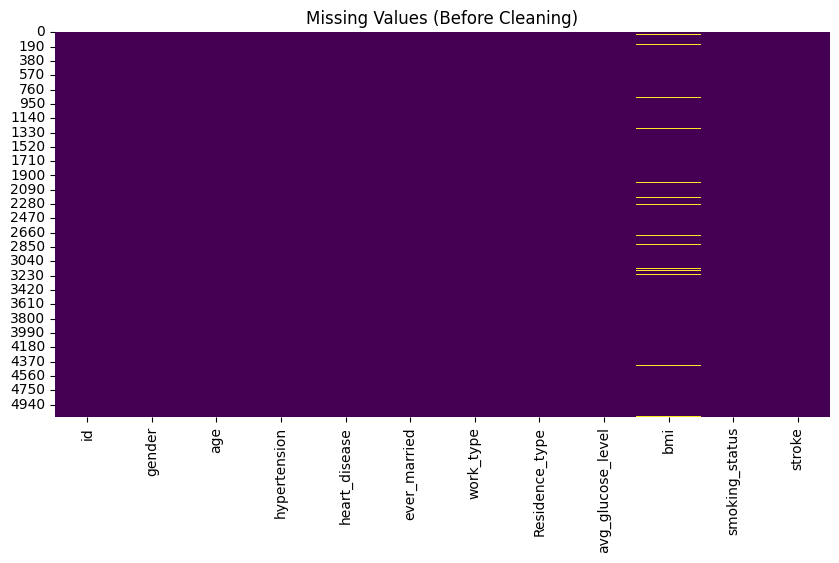

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [30]:
# Explore missing values to understand data quality issues.

plt.figure(figsize=(10,5))
sns.heatmap(dataF.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values (Before Cleaning)")
plt.show()

dataF.isnull().sum()


In [31]:
### Data cleaning happens here


#Remove duplicates
dataF = dataF.drop_duplicates()

# Handle missing values
for col in dataF.columns:
    if dataF[col].dtype in ["int64", "float64"]:
        dataF[col] = dataF[col].fillna(dataF[col].median())
    else:
        dataF[col] = dataF[col].fillna(dataF[col].mode()[0])

# Standardize categorical values
for col in dataF.select_dtypes(include="object").columns:
    dataF[col] = dataF[col].str.strip().str.lower()

# Validating numerical ranges
if "age" in dataF.columns:
    dataF = dataF[(dataF["age"] >= 0) & (dataF["age"] <= 120)]

if "bmi" in dataF.columns:
    dataF = dataF[(dataF["bmi"] > 10) & (dataF["bmi"] < 60)]

display(dataF.head(20))  # shows a scrollable table of our dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.1,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1
5,56669,male,81.0,0,0,yes,private,urban,186.21,29.0,formerly smoked,1
6,53882,male,74.0,1,1,yes,private,rural,70.09,27.4,never smoked,1
7,10434,female,69.0,0,0,no,private,urban,94.39,22.8,never smoked,1
8,27419,female,59.0,0,0,yes,private,rural,76.15,28.1,unknown,1
9,60491,female,78.0,0,0,yes,private,urban,58.57,24.2,unknown,1


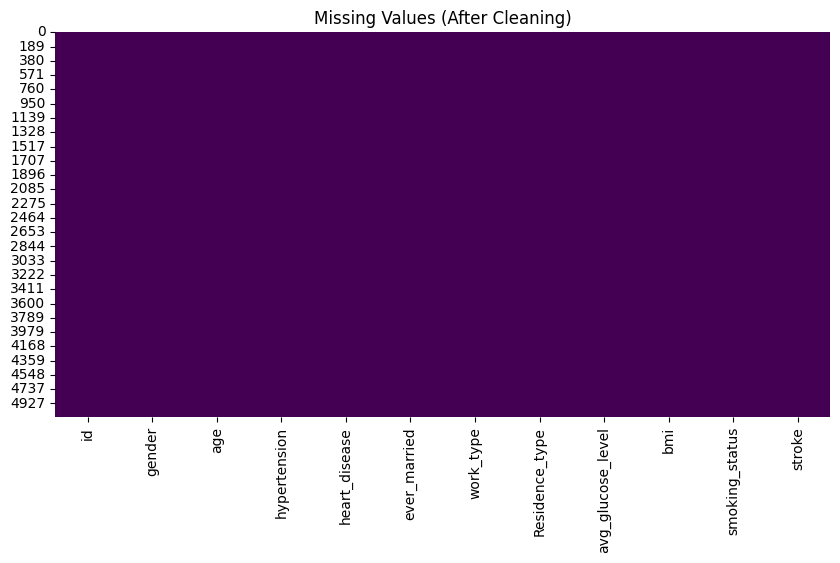

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [32]:
# Now we are checking if missing values have been handled.
plt.figure(figsize=(10,5))
sns.heatmap(dataF.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values (After Cleaning)")
plt.show()

dataF.isnull().sum()


In [33]:
#Finally, we save our cleaned dataset into a new excell.

dataF.to_csv("healthcare-dataset-stroke-data-cleaned.csv", index=False)
print("✅ Cleaned dataset saved as healthcare-dataset-stroke-data-cleaned.csv")


✅ Cleaned dataset saved as healthcare-dataset-stroke-data-cleaned.csv


In [34]:
#download the new cleaned dataset as csv onto our device.
files.download("healthcare-dataset-stroke-data-cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>